# Import Packages

In [1]:
# Import needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from xgboost import XGBClassifier
import xgboost as xgb
import pickle

# Load The Dataset

In [2]:
# Read data in the excel file
df = pd.read_csv('heart.csv')
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


# EDA

In [3]:
df.shape


(1025, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
#Check null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:

df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [8]:
# Percentage of patients have and do not have heart disease
df['target'].value_counts()/df.shape[0]*100 

1    51.317073
0    48.682927
Name: target, dtype: float64

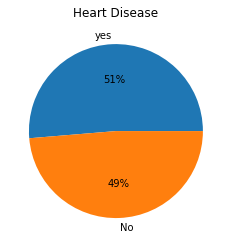

In [9]:
# Create a plot to display the percentage of the positive and negative heart disease 
labels = ['yes', 'No']
values = df['target'].value_counts().values

plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.title('Heart Disease')
plt.show()

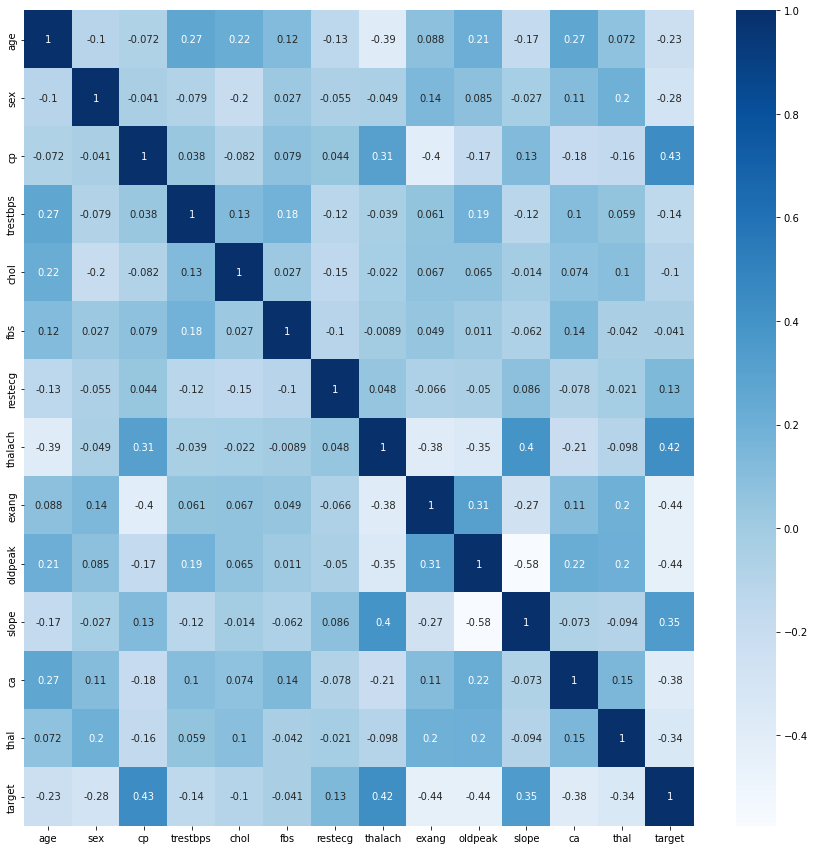

In [10]:
# Correlation map
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot = True, cmap = "Blues")
plt.show()

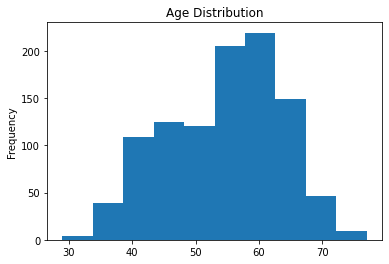

In [11]:
# Display age distribution
df['age'].plot(kind = 'hist', title = 'Age Distribution')
plt.show()

In [12]:
# Get min, max and average of the age
print('Min age: ', min(df['age']))
print('Max age: ', max(df['age']))
print('Average age: ', df['age'].mean())

Min age:  29
Max age:  77
Average age:  54.43414634146342


C:\Users\shiny\anaconda3\envs\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\shiny\anaconda3\envs\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



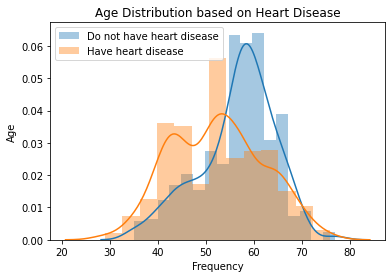

In [13]:
# Display age distribution based on heart disease
sns.distplot(df[df['target'] == 0]['age'], label='Do not have heart disease')
sns.distplot(df[df['target'] == 1]['age'], label = 'Have heart disease')
plt.xlabel('Frequency')
plt.ylabel('Age')
plt.title('Age Distribution based on Heart Disease')
plt.legend()
plt.show()

In [14]:
# Get min, max and average of the age of the people do not have heart diseas
print('Min age of people who do not have heart disease: ', min(df[df['target'] == 0]['age']))
print('Max age of people who do not have heart disease: ', max(df[df['target'] == 0]['age']))
print('Average age of people who do not have heart disease: ', df[df['target'] == 0]['age'].mean())

Min age of people who do not have heart disease:  35
Max age of people who do not have heart disease:  77
Average age of people who do not have heart disease:  56.569138276553105


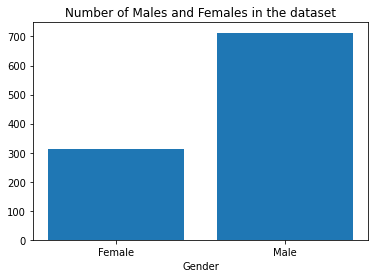

In [15]:
# Number of males and females
F = df[df['sex'] == 0].count()['target']
M = df[df['sex'] == 1].count()['target']

# Create a plot
figure, ax = plt.subplots(figsize = (6, 4))
ax.bar(x = ['Female', 'Male'], height = [F, M])
plt.xlabel('Gender')
plt.title('Number of Males and Females in the dataset')
plt.show()

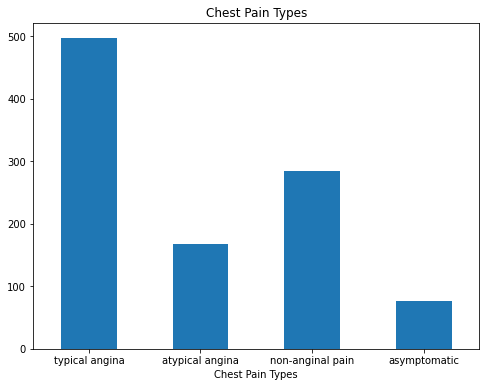

In [16]:
# Display chest pain types in bar chart
df.groupby(df['cp']).count()['target'].plot(kind = 'bar', title = 'Chest Pain Types', figsize = (8, 6))
plt.xlabel('Chest Pain Types')
plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)
plt.show()

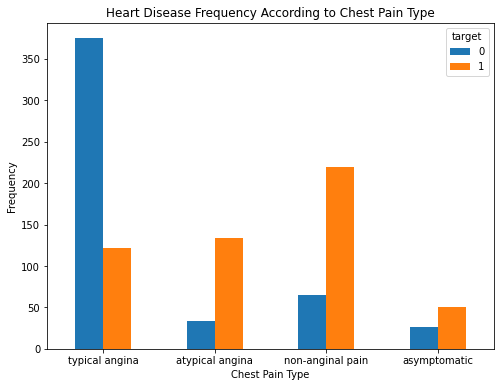

In [17]:
# Display chest pain types based on the target
pd.crosstab(df.cp,df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

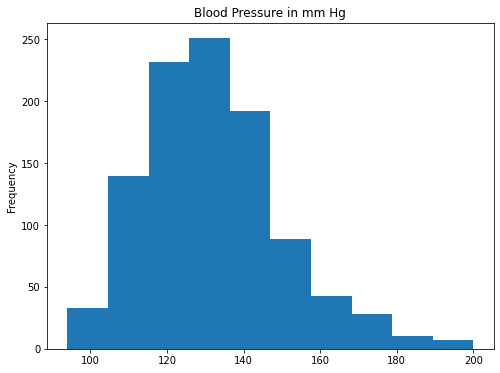

In [18]:
# Display blood pressure distribution
df['trestbps'].plot(kind = 'hist', title = 'Blood Pressure in mm Hg', figsize = (8, 6))
plt.show()

C:\Users\shiny\anaconda3\envs\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\shiny\anaconda3\envs\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



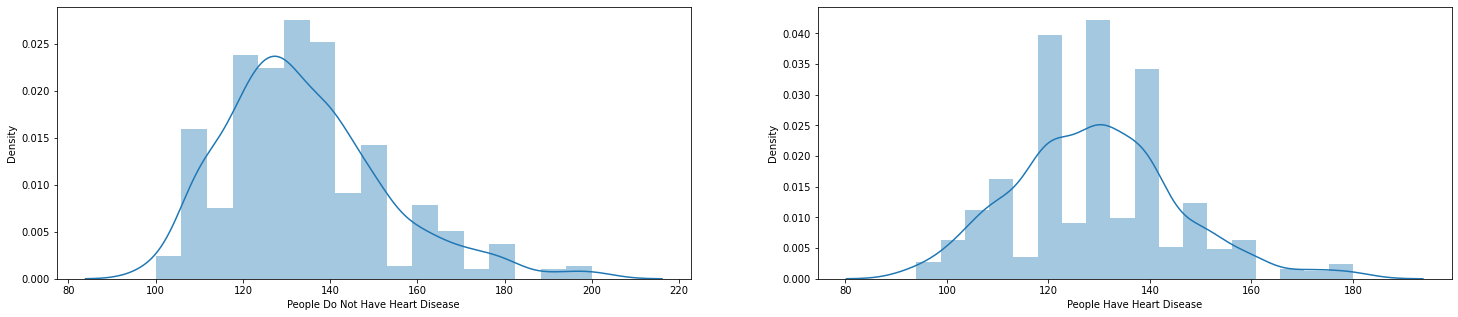

In [19]:
# Display blood pressure distribution based on heart disease
fig, (axis1, axis2) = plt.subplots(1, 2,figsize=(25, 5))
ax = sns.distplot(df[df['target'] == 0]['trestbps'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel='People Do Not Have Heart Disease')
ax = sns.distplot(df[df['target'] == 1]['trestbps'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel='People Have Heart Disease')
plt.show()

In [20]:
# Get min, max and average of the  blood pressure of the people do not have heart diseas
print('Min blood pressure of people who do not have heart disease: ', min(df[df['target'] == 1]['trestbps']))
print('Max blood pressure of people who do not have heart disease: ', max(df[df['target'] == 1]['trestbps']))
print('Average blood pressure of people who do not have heart disease: ', df[df['target'] == 1]['trestbps'].mean())

Min blood pressure of people who do not have heart disease:  94
Max blood pressure of people who do not have heart disease:  180
Average blood pressure of people who do not have heart disease:  129.24524714828897


In [21]:
# Get min, max and average of the blood pressure of the people have heart diseas
print('Min blood pressure of people who have heart disease: ', min(df[df['target'] == 1]['trestbps']))
print('Max blood pressure of people who have heart disease: ', max(df[df['target'] == 1]['trestbps']))
print('Average blood pressure of people who have heart disease: ', df[df['target'] == 1]['trestbps'].mean())

Min blood pressure of people who have heart disease:  94
Max blood pressure of people who have heart disease:  180
Average blood pressure of people who have heart disease:  129.24524714828897


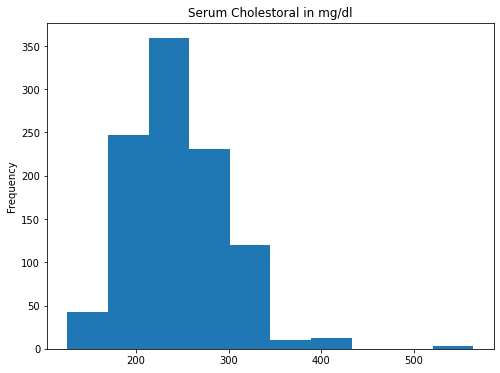

In [22]:
# Display Cholestoral distribution
df['chol'].plot(kind = 'hist', title = 'Serum Cholestoral in mg/dl', figsize = (8, 6))
plt.show()

C:\Users\shiny\anaconda3\envs\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\shiny\anaconda3\envs\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



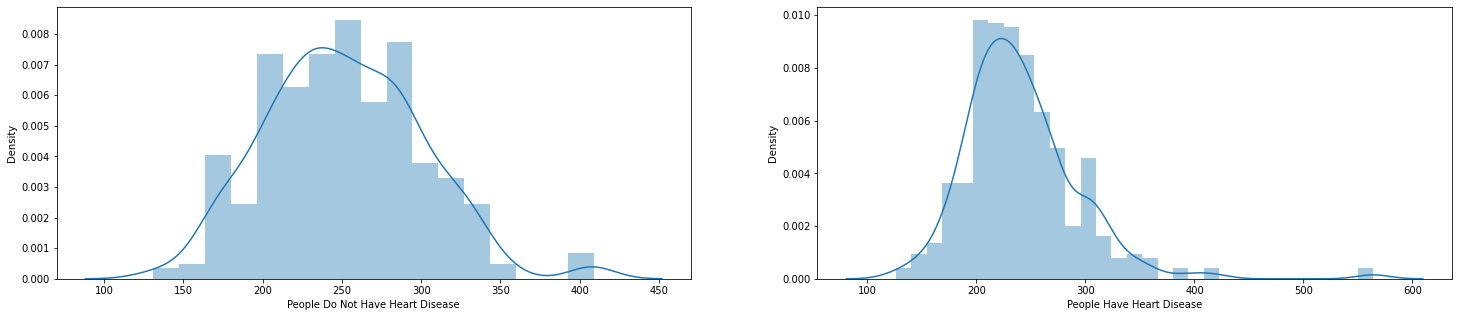

In [23]:
# Display Cholestoral distribution based on heart disease
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))
ax = sns.distplot(df[df['target'] == 0]['chol'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel='People Do Not Have Heart Disease')
ax = sns.distplot(df[df['target'] == 1]['chol'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel='People Have Heart Disease')
plt.show()

In [24]:
# Get min, max and average of the Cholestoral of the people do not have heart diseas
print('Min cholestoral of people who do not have heart disease: ', min(df[df['target'] == 0]['chol']))
print('Max cholestoral of people who do not have heart disease: ', max(df[df['target'] == 0]['chol']))
print('Average cholestoral of people who do not have heart disease: ', df[df['target'] == 0]['chol'].mean())

Min cholestoral of people who do not have heart disease:  131
Max cholestoral of people who do not have heart disease:  409
Average cholestoral of people who do not have heart disease:  251.2925851703407


In [25]:
# Get min, max and average of the Cholestoral of the people have heart diseas
print('Min cholestoral of people who have heart disease: ', min(df[df['target'] == 1]['chol']))
print('Max cholestoral of people who have heart disease: ', max(df[df['target'] == 1]['chol']))
print('Average cholestorale of people who have heart disease: ', df[df['target'] == 1]['chol'].mean())

Min cholestoral of people who have heart disease:  126
Max cholestoral of people who have heart disease:  564
Average cholestorale of people who have heart disease:  240.97908745247148


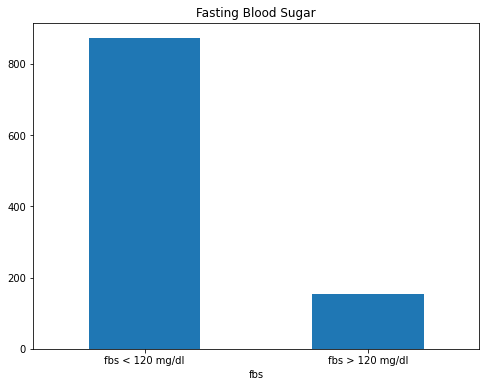

In [26]:
# Display fasting blood sugar in bar chart
df.groupby(df['fbs']).count()['target'].plot(kind = 'bar', title = 'Fasting Blood Sugar', figsize = (8, 6))
plt.xticks(np.arange(2), ('fbs < 120 mg/dl', 'fbs > 120 mg/dl'), rotation = 0)
plt.show()

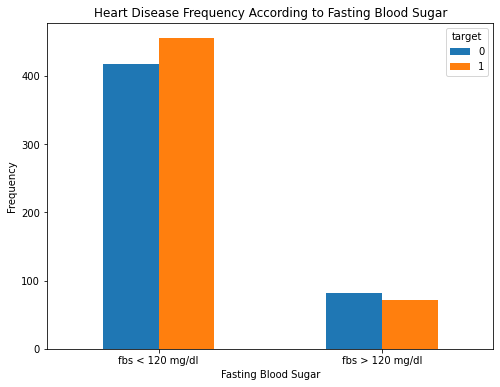

In [27]:
# Display fasting blood sugar based on the target
pd.crosstab(df.fbs,df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar')
plt.xticks(np.arange(2), ('fbs < 120 mg/dl', 'fbs > 120 mg/dl'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

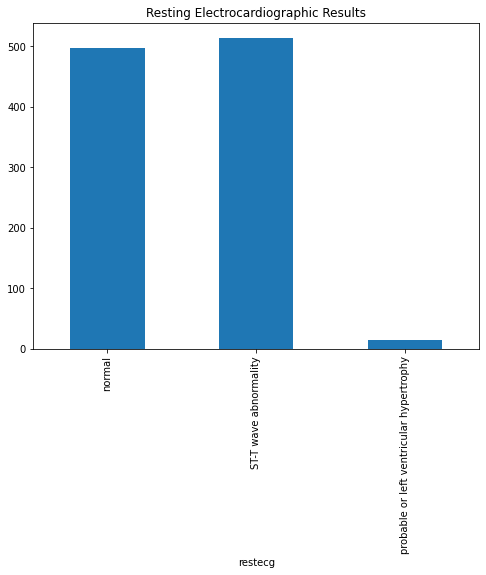

In [28]:
# Display electrocardiographic results in bar chart
df.groupby(df['restecg']).count()['target'].plot(kind = 'bar', title = 'Resting Electrocardiographic Results', figsize = (8, 6))
plt.xticks(np.arange(3), ('normal', 'ST-T wave abnormality', 'probable or left ventricular hypertrophy'))
plt.show()

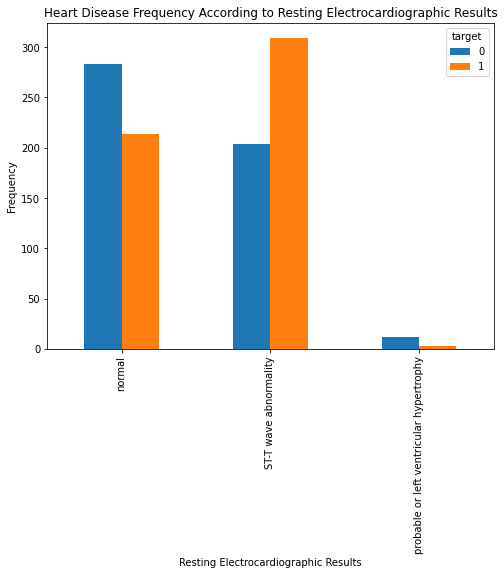

In [29]:
# Display resting electrocardiographic results based on the target
pd.crosstab(df.restecg,df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Resting Electrocardiographic Results')
plt.xticks(np.arange(3), ('normal', 'ST-T wave abnormality', 'probable or left ventricular hypertrophy'))
plt.xlabel('Resting Electrocardiographic Results')
plt.ylabel('Frequency')
plt.show()

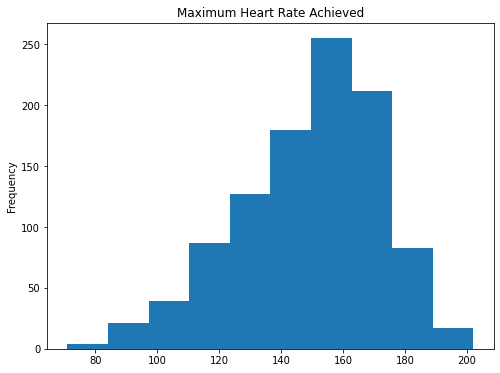

In [30]:
# Display maximum heart rate distribution
df['thalach'].plot(kind = 'hist', title = 'Maximum Heart Rate Achieved', figsize = (8, 6))
plt.show()

C:\Users\shiny\anaconda3\envs\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\shiny\anaconda3\envs\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



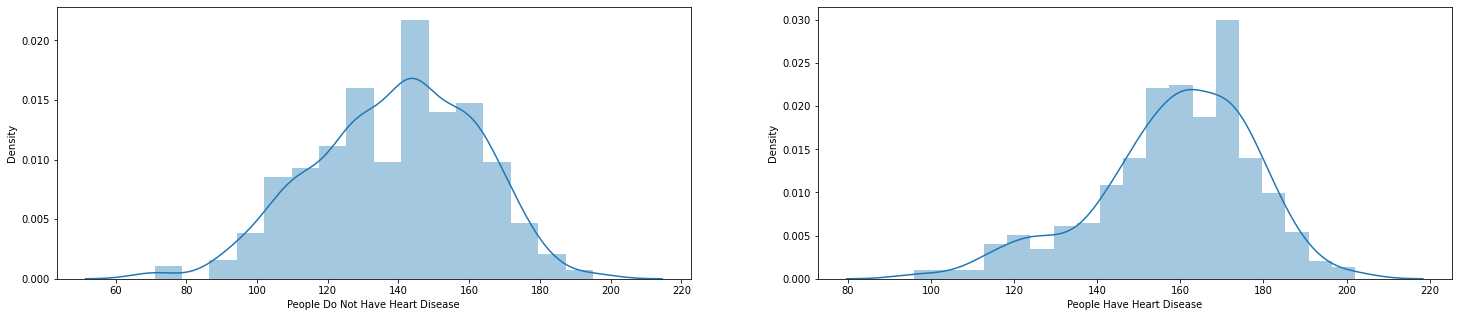

In [31]:
# Display maximum heart rate distribution based on heart disease
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))
ax = sns.distplot(df[df['target'] == 0]['thalach'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel = 'People Do Not Have Heart Disease')
ax = sns.distplot(df[df['target'] == 1]['thalach'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel = 'People Have Heart Disease')
plt.show()

# Machine Learning Algorithm


## SVM NB XGB

In [32]:
# Initialize data and target
target = df['target']
features = df.drop(['target'], axis = 1)

In [33]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 0)

In [34]:
# Train and evaluate model
def fit_eval_model(model, train_features, y_train, test_features, y_test):
    results = {}
    
    # Train the model
    model.fit(train_features, y_train)
    
    # Test the model
    train_predicted = model.predict(train_features)
    test_predicted = model.predict(test_features)
    
     # Classification report and Confusion Matrix
    results['classification_report'] = classification_report(y_test, test_predicted,target_names=['No Disease','Disease'])
    results['confusion_matrix'] = confusion_matrix(y_test, test_predicted)
    #plt.figure(figsize=(7,6))
    #sns.heatmap(results['confusion_matrix'],annot=True,fmt='d')
        
    return results

## Model Traning

In [35]:
import xgboost as xgb
svc=SVC() 
gnb = GaussianNB()
xgb =  xgb.XGBClassifier(learning_rate=0.001)
# Fit and evaluate models
results = {}
for cls in [svc, gnb,xgb]:
    cls_name = cls.__class__.__name__
    results[cls_name] = {}
    results[cls_name] = fit_eval_model(cls, X_train, y_train, X_test, y_test)
    

C:\Users\shiny\anaconda3\envs\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[17:20:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


## Model Testing

In [36]:
# Print classifiers results
for result in results:
    print (result)
    print()
    for i in results[result]:
        print (i, ':')
        print(results[result][i])
        print()
    print ('-----')
    print()

SVC

classification_report :
              precision    recall  f1-score   support

  No Disease       0.77      0.67      0.72        98
     Disease       0.73      0.81      0.77       107

    accuracy                           0.75       205
   macro avg       0.75      0.74      0.74       205
weighted avg       0.75      0.75      0.74       205


confusion_matrix :
[[66 32]
 [20 87]]

-----

GaussianNB

classification_report :
              precision    recall  f1-score   support

  No Disease       0.88      0.81      0.84        98
     Disease       0.83      0.90      0.86       107

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205


confusion_matrix :
[[79 19]
 [11 96]]

-----

XGBClassifier

classification_report :
              precision    recall  f1-score   support

  No Disease       0.91      0.95      0.93        98
     Disease       0.95      0.92      

Feature: age, Score: 0.03806
Feature: sex, Score: 0.11426
Feature: cp, Score: 0.39803
Feature: trestbps, Score: 0.01001
Feature: chol, Score: 0.03298
Feature: fbs, Score: 0.00000
Feature: restecg, Score: 0.00000
Feature: thalach, Score: 0.03265
Feature: exang, Score: 0.04626
Feature: oldpeak, Score: 0.04615
Feature: slope, Score: 0.01554
Feature: ca, Score: 0.10617
Feature: thal, Score: 0.15989


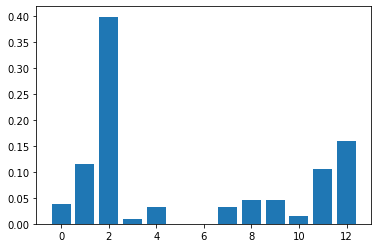

In [37]:
# get importance
importance = xgb.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (features.columns[i], v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Algorithm Comparison

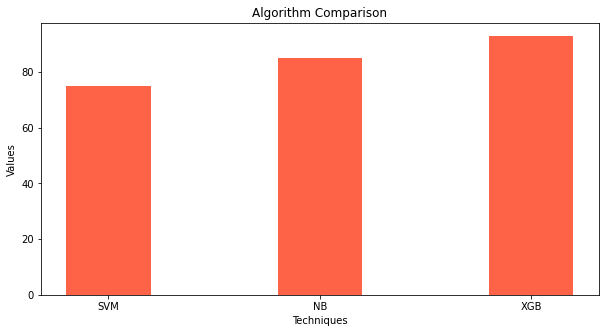

In [38]:
data = {'SVM':75 , 'NB':85, 'XGB':93}
techniques = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(techniques, values, color ='tomato',
		width = 0.4)
plt.xlabel("Techniques")
plt.ylabel("Values")
plt.title("Algorithm Comparison")
plt.show()


# Proposed Algorithm

<blockquote>Enhanced CNN + LSTM</blockquote>

In [39]:
import webbrowser
webbrowser.open('http://localhost:8888/notebooks/SAJ_Heart_Disease_Proposal.ipynb', new=2)

True